In [1]:
import pandas as pd
import matplotlib.pyplot as plt

mean = x    137.08
dtype: float64, max = x    228
dtype: int64 min = x    83
dtype: int64


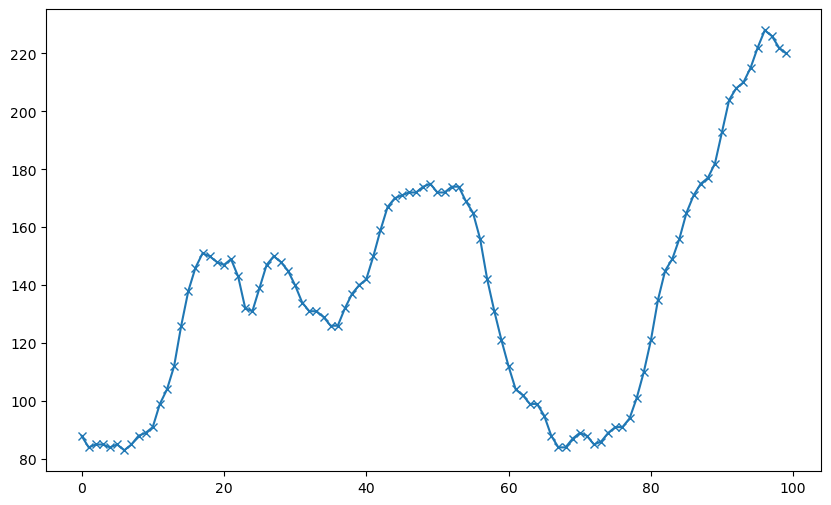

In [2]:
#Read data and plot
x = pd.read_csv('wwwusage.txt')
print(f'mean = {x.mean(axis =0)}, max = {x.max(axis = 0)} min = {x.min(axis = 0)}')

plt.figure(figsize = (10,6))
plt.plot(x, linestyle = '-', marker = 'x')

Plot above seems nonstationary.

**Reasons**:
1. Visible Trends:
The plot shows noticeable trends over time, including both upward and downward movements.
The initial sharp increase followed by fluctuations and another significant increase suggests non-stationarity.

2. The mean value of the time series appears to change over different segments.
This lack of constancy in the mean is indicative of non-stationarity.


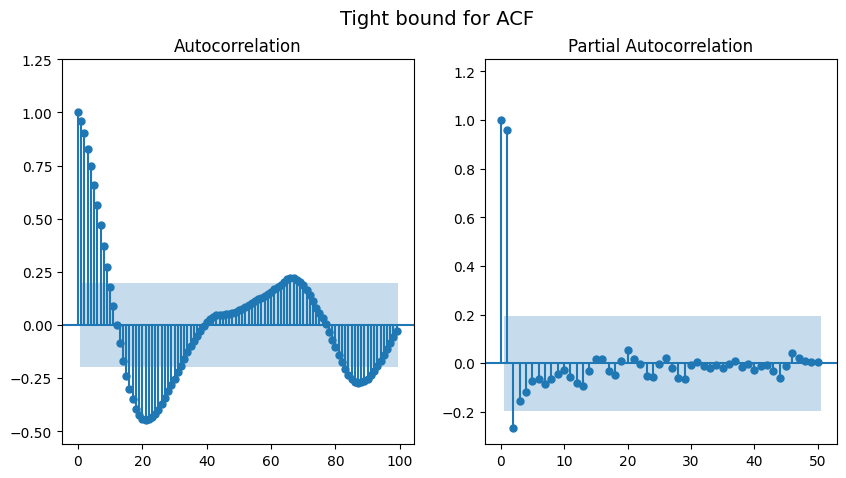

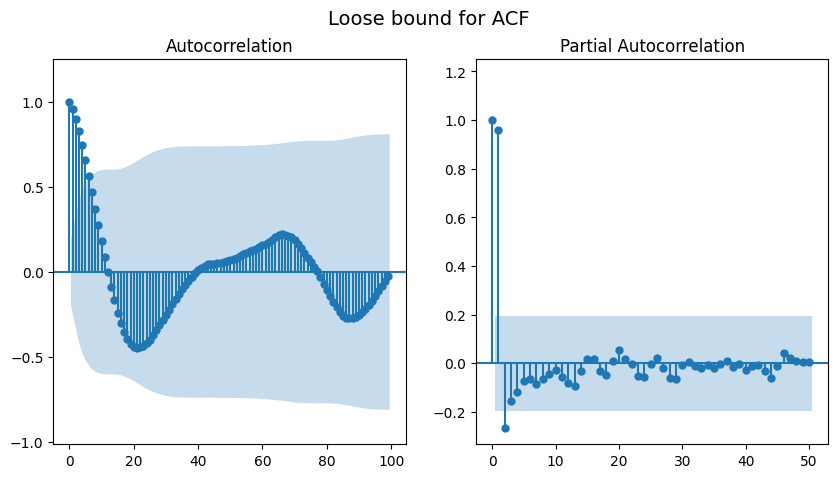

In [3]:
#Look at SACF and SPACF to decide on ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x, lags = 99, ax=ax[0], auto_ylims=True, bartlett_confint = False)
plot_pacf(x, lags = 50, ax=ax[1], auto_ylims = True)
plt.suptitle('Tight bound for ACF', fontsize = 14)
plt.show()

#Loose bound for ACF: 1.96s_(r_h)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x, lags=99, ax=ax[0], auto_ylims = True)
plot_pacf(x, lags=50, ax=ax[1], auto_ylims = True)
plt.suptitle('Loose bound for ACF', fontsize = 14)
plt.show()

Two plots: first is with constant, tight bound, second is loose bound for ACF.

From loose bound, both ACF and PACF cut off, but ACF cut off less abruptly. But with tight bound, ACF flactuates while PACF cuts off.

**No ARIMA model suggsted**

mean = x    1.333333
dtype: float64, max = x    14.0
dtype: float64 min = x   -14.0
dtype: float64


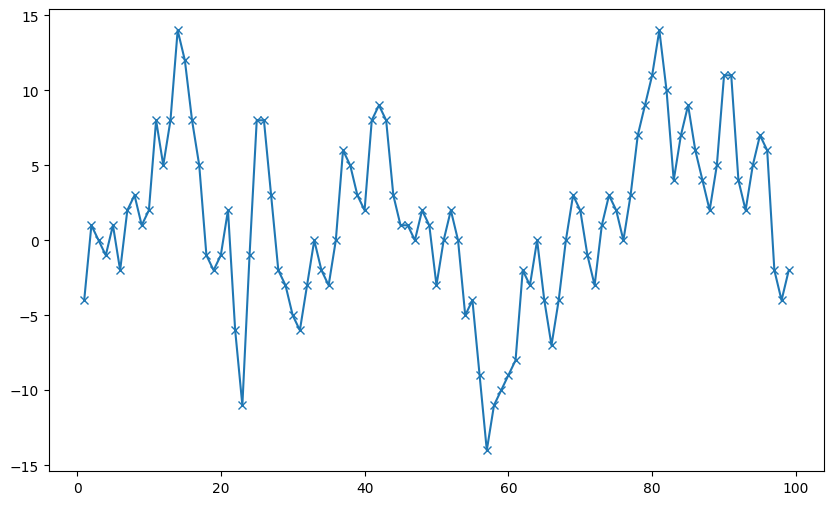

In [4]:
x_diff1 = x.diff()
x_diff1 = x_diff1[1:] #remove NaN in first row
x_diff1

plt.figure(figsize = (10,6))
plt.plot(x_diff1, linestyle = '-', marker = 'x')

print(f'mean = {x_diff1.mean(axis =0)}, max = {x_diff1.max(axis = 0)} min = {x_diff1.min(axis = 0)}')


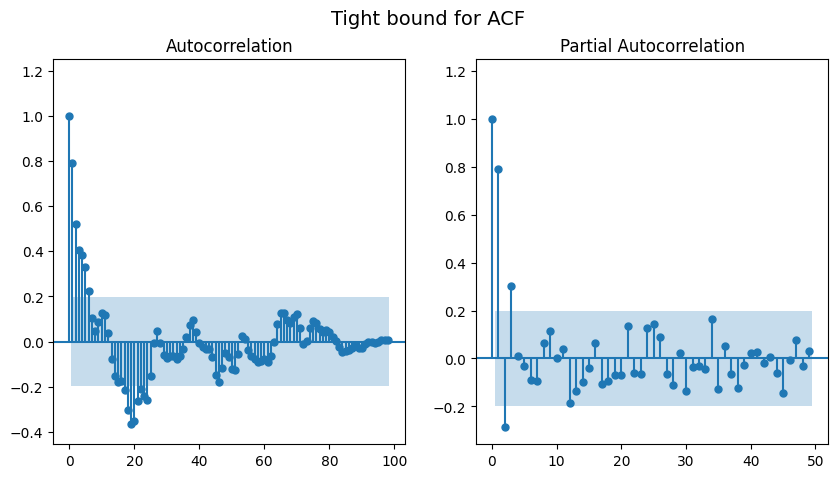

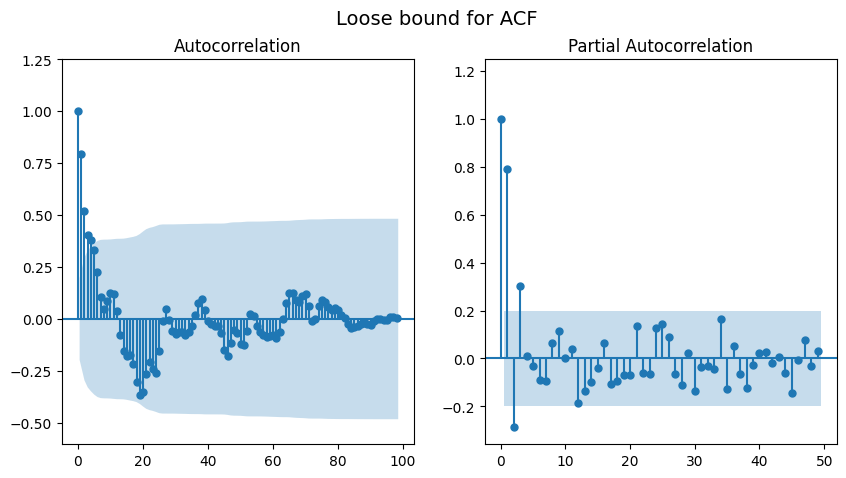

In [137]:
#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff1, lags = 98, ax=ax[0], auto_ylims = True, bartlett_confint = False)
plot_pacf(x_diff1, lags = 49, ax=ax[1], auto_ylims = True)
plt.suptitle('Tight bound for ACF', fontsize = 14)
plt.show()

#Loose bound for ACF: 1.96s_(r_h)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff1, lags=98, ax=ax[0], auto_ylims = True)
plot_pacf(x_diff1, lags=49, ax=ax[1], auto_ylims = True)
plt.suptitle('Loose bound for ACF', fontsize = 14)
plt.show()


Still obvious trending component and ACF dies down slowly still. Difference again.

**No ARIMA model to be suggested.**

mean = x    0.020408
dtype: float64, max = x    10.0
dtype: float64 min = x   -8.0
dtype: float64


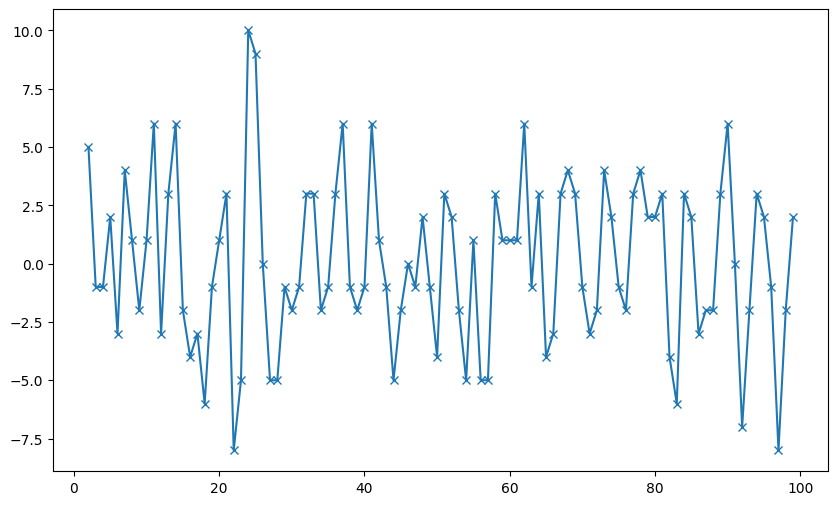

In [6]:
x_diff2 = x_diff1.diff()[1:]


plt.figure(figsize = (10,6))
plt.plot(x_diff2, linestyle = '-', marker = 'x')

print(f'mean = {x_diff2.mean(axis =0)}, max = {x_diff2.max(axis = 0)} min = {x_diff2.min(axis = 0)}')

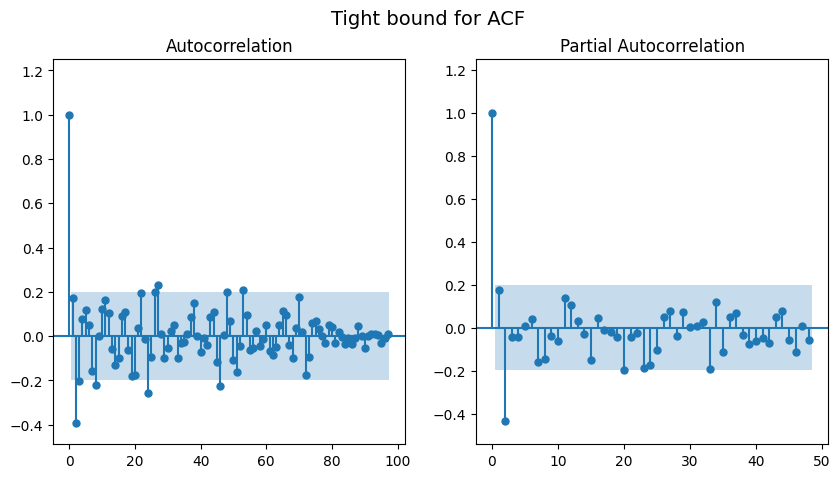

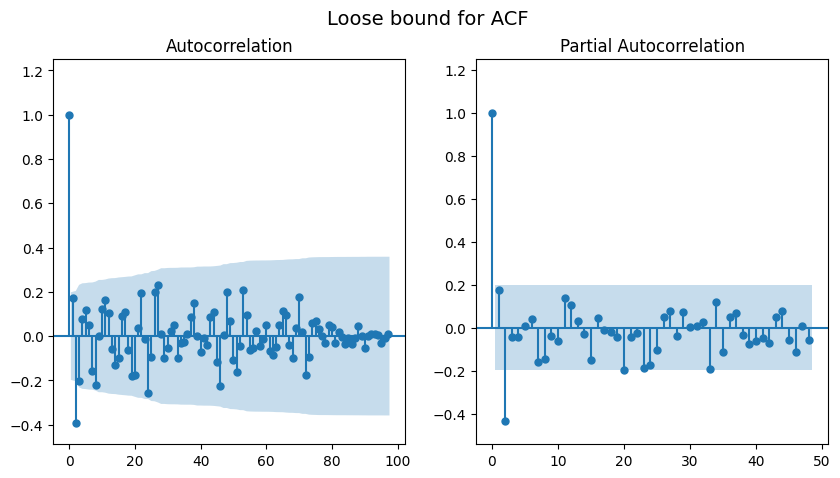

In [7]:
#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff2, lags = 97, ax=ax[0], auto_ylims = True, bartlett_confint = False)
plot_pacf(x_diff2, lags = 48, ax=ax[1], auto_ylims = True)
plt.suptitle('Tight bound for ACF', fontsize = 14)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff2, lags = 97, ax=ax[0], auto_ylims = True, bartlett_confint = True)
plot_pacf(x_diff2, lags = 48, ax=ax[1], auto_ylims = True)
plt.suptitle('Loose bound for ACF', fontsize = 14)
plt.show()


Difference of 2 seems more like a stationary time series (according to the plot).

The ACF also suggests a stationary time series, since it cuts off after 2 (looking at the loose bound).

For completeness, we look at the behavior of differencing it once again.

**ARIMA model suggested:**
1. ARIMA(0,2,2)
2. ARIMA(2,2,0)
3. ARIMA(2,2,2)


mean = x   -0.030928
dtype: float64, max = x    15.0
dtype: float64 min = x   -11.0
dtype: float64


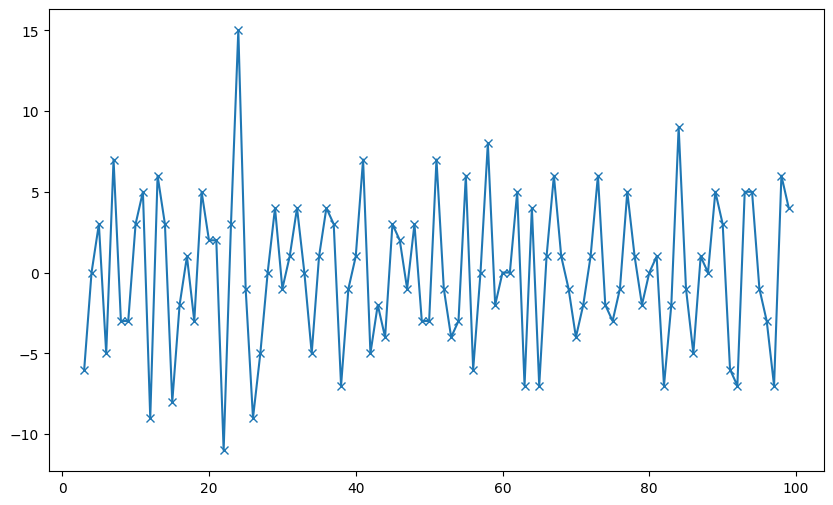

In [9]:
x_diff3 = x_diff2.diff()[1:]

plt.figure(figsize = (10,6))
plt.plot(x_diff3, linestyle = '-', marker = 'x')


print(f'mean = {x_diff3.mean(axis =0)}, max = {x_diff3.max(axis = 0)} min = {x_diff3.min(axis = 0)}')

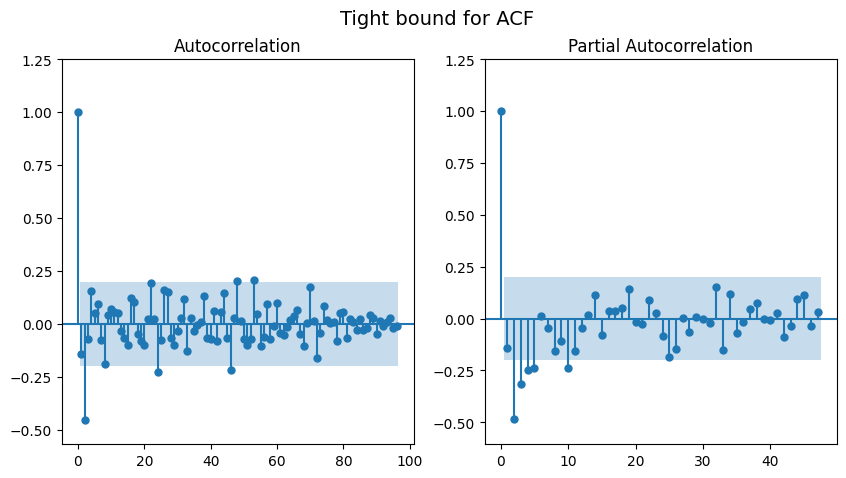

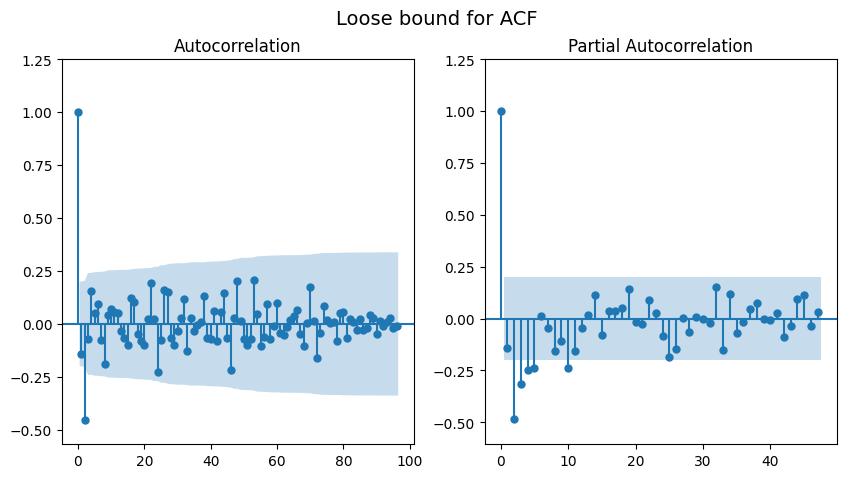

In [11]:
#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff3, lags = 96, ax=ax[0], auto_ylims = True, bartlett_confint = False)
plot_pacf(x_diff3, lags = 47, ax=ax[1], auto_ylims = True)
plt.suptitle('Tight bound for ACF', fontsize = 14)
plt.show()

#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff3, lags = 96, ax=ax[0], auto_ylims = True, bartlett_confint = True)
plot_pacf(x_diff3, lags = 47, ax=ax[1], auto_ylims = True)
plt.suptitle('Loose bound for ACF', fontsize = 14)
plt.show()



The ACF and PACF of difference = 3 did not really improve much if any.

In fact, PACF does not cut off as cleanly and immediately.

We perform another differencing.

**ARIMA model suggested:**
1. ARIMA(0,3,2)
2. ARIMA(5,3,0)
3. ARIMA(5,3,2)

mean = x    0.104167
dtype: float64, max = x    15.0
dtype: float64 min = x   -16.0
dtype: float64


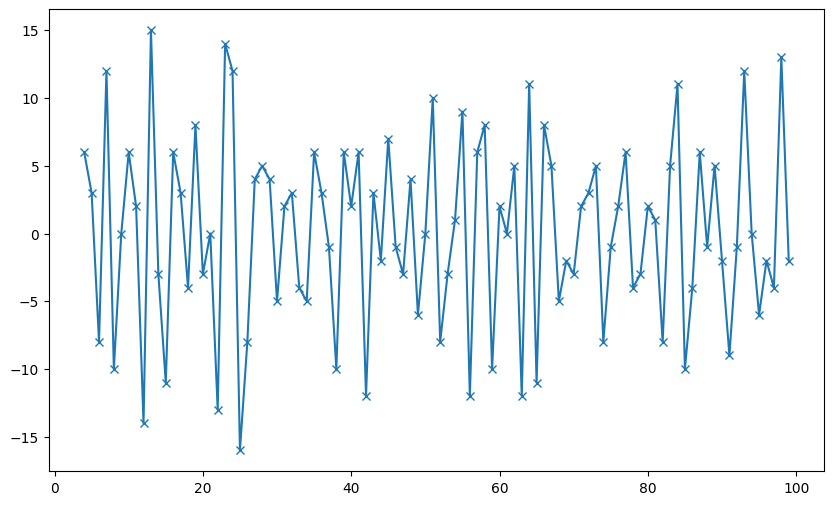

In [12]:
x_diff4 = x_diff3.diff()[1:]

plt.figure(figsize = (10,6))
plt.plot(x_diff4, linestyle = '-', marker = 'x')


print(f'mean = {x_diff4.mean(axis =0)}, max = {x_diff4.max(axis = 0)} min = {x_diff4.min(axis = 0)}')

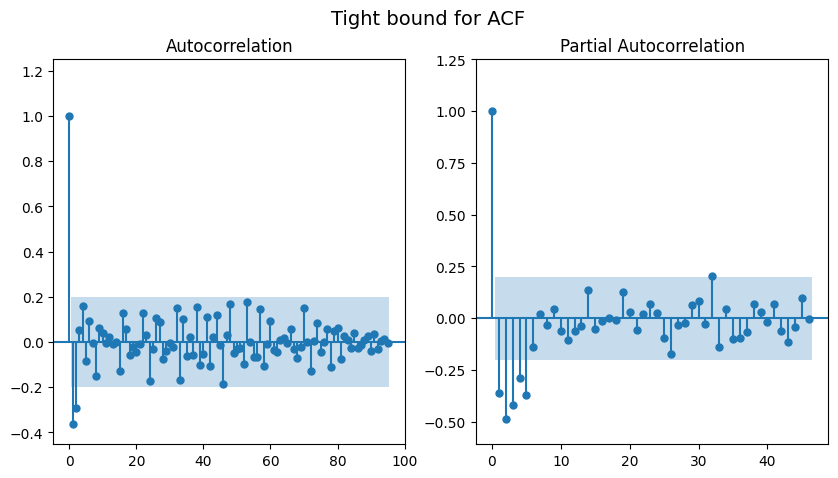

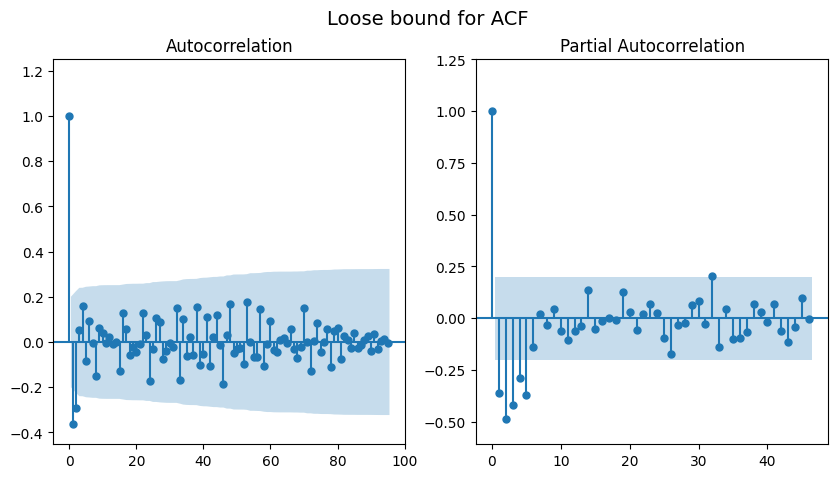

In [14]:
#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff4, lags = 95, ax=ax[0], auto_ylims = True, bartlett_confint = False)
plot_pacf(x_diff4, lags = 46, ax=ax[1], auto_ylims = True)
plt.suptitle('Tight bound for ACF', fontsize = 14)
plt.show()

#Tighter bound: 1.96/\sqrt(n)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(x_diff4, lags = 95, ax=ax[0], auto_ylims = True, bartlett_confint = True)
plot_pacf(x_diff4, lags = 46, ax=ax[1], auto_ylims = True)
plt.suptitle('Loose bound for ACF', fontsize = 14)
plt.show()



Here, we can see when difference = 4, the resulting time series becomes a stationary one (from plot and SACF).

We stop differencing now

**ARIMA model suggested**
1. ARIMA(0,4,2)
2. ARIMA(5,4,0)
3. ARIMA(5,4,2)

# Model diagnostic

Current possible models:
1. ARIMA(0,2,2)
2. ARIMA(2,2,0)
3. ARIMA(2,2,2)
4. ARIMA(0,3,2)
5. ARIMA(5,3,0)
6. ARIMA(5,3,2)
7. ARIMA(0,4,2)
8. ARIMA(5,4,0)
9. ARIMA(5,4,2)

c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


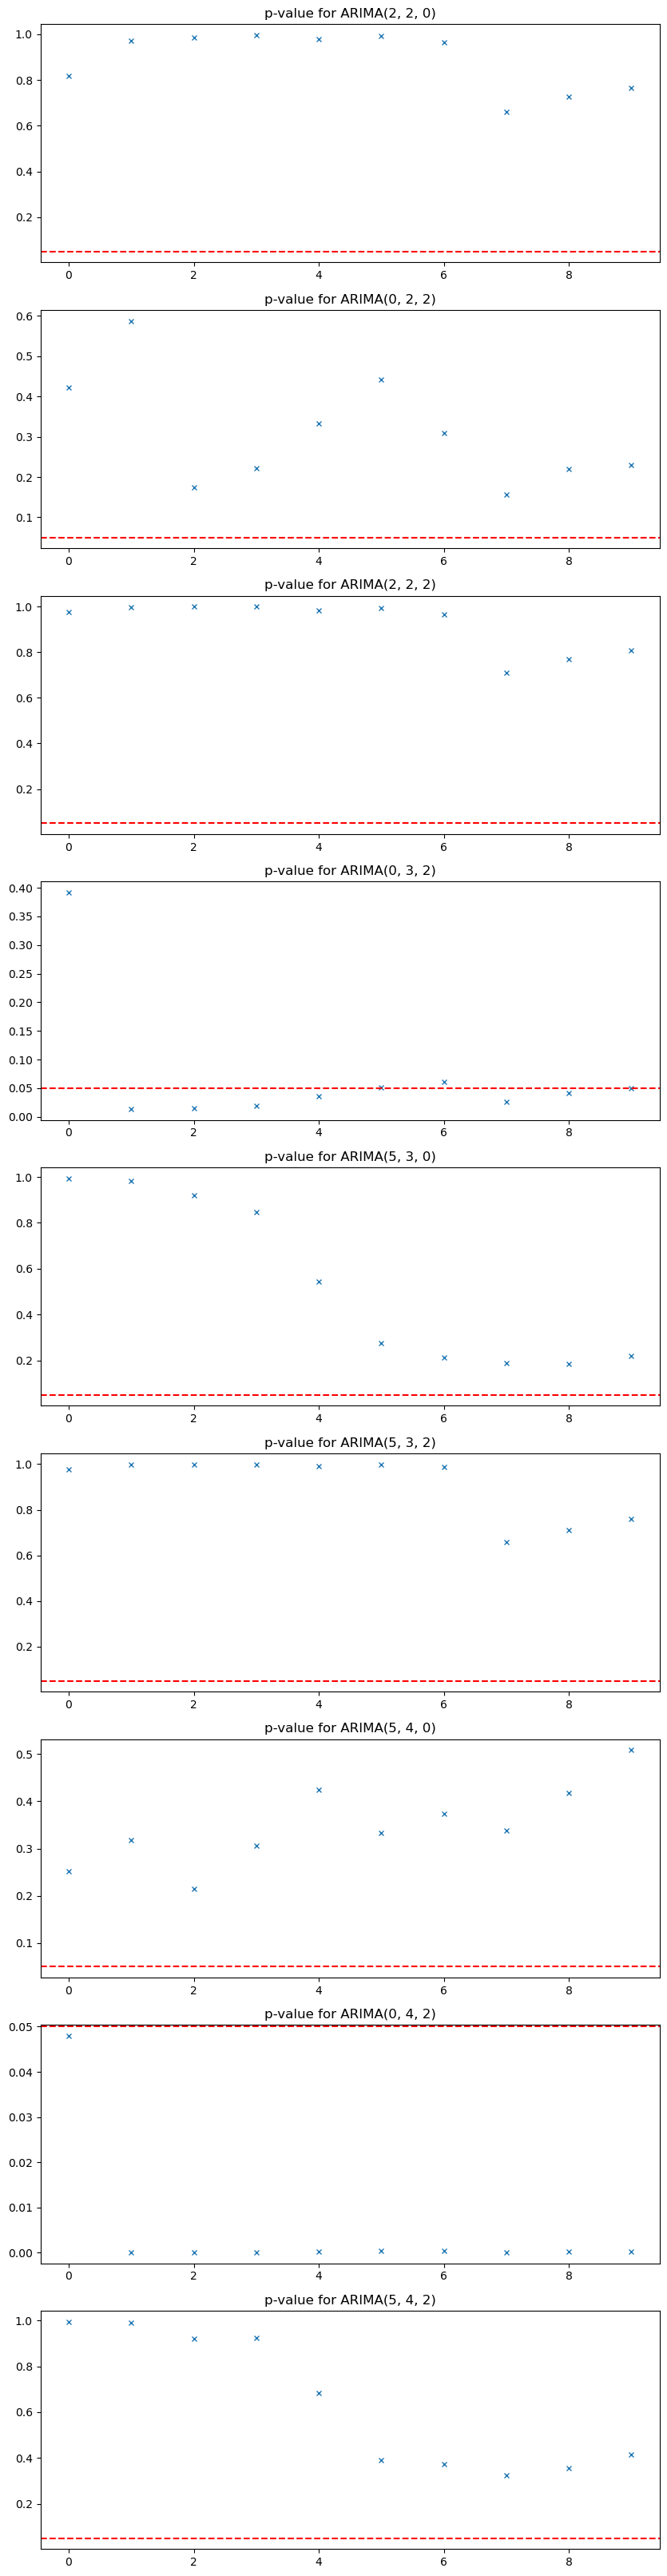

In [22]:
#Ljung-Box Statistic
from statsmodels.tsa.arima.model import ARIMA

orders = [(2,2,0), (0,2,2), (2,2,2),
          (0,3,2), (5,3,0), (5,3,2),
          (5,4,0), (0,4,2), (5,4,2)]



fig, ax = plt.subplots(len(orders),1,figsize=(10,20))
plt.subplots_adjust(bottom=-0.7)  # Adjust the bottom spacing
for i,order in enumerate(orders):
  model_i = ARIMA(endog = x, order = order)
  results = model_i.fit()

  p_values_i = results.test_serial_correlation(method = 'ljungbox')[:,1].flatten()

  
  ax[i].set_title(f'p-value for ARIMA{order}')  
  ax[i].plot(p_values_i, marker = 'x', markersize = 5, linestyle = 'None')
  ax[i].axhline(y=0.05, color = 'red', linestyle = '--')

plt.show()


From the Ljung-Box test, we have the remaining candidates:

1. ARIMA(2,2,0)
2. ARIMA(0,2,2)
3. ARIMA(2,2,2)
4. ARIMA(5,3,0)
5. ARIMA(5,3,2)
6. ARIMA(5,4,0)
7. ARIMA(5,4,2)


In [5]:
#Calculate AIC to pick best adequate model
orders = [(2,2,0), (0,2,2), (2,2,2),
          (5,3,0), (5,3,2),
          (5,4,0), (5,4,2)]



for i, order in enumerate(orders):

  model_i = ARIMA(endog = x, order = order)
  results_i = model_i.fit()

  print(f'AIC of ARIMA{order}: {results_i.aic}')

AIC of ARIMA(2, 2, 0): 511.4647833810499
AIC of ARIMA(0, 2, 2): 517.2140993057651
AIC of ARIMA(2, 2, 2): 515.1305472095626
AIC of ARIMA(5, 3, 0): 529.9379868606707
AIC of ARIMA(5, 3, 2): 521.6735686846415
AIC of ARIMA(5, 4, 0): 562.8151518180157
AIC of ARIMA(5, 4, 2): 536.6265152947335


c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Hence, we choose ARIMA(2,2,0), since it has the lowest AIC score.


In [35]:
final_model = ARIMA(endog=x, order = (2,2,0))
final_results = final_model.fit()
print(final_results.summary())



                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -252.732
Date:                Thu, 14 Mar 2024   AIC                            511.465
Time:                        21:27:41   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056       0.459
ar.L2         -0.4407      0.087     -5.093      0.000      -0.610      -0.271
sigma2        10.1268      1.519      6.668      0.0

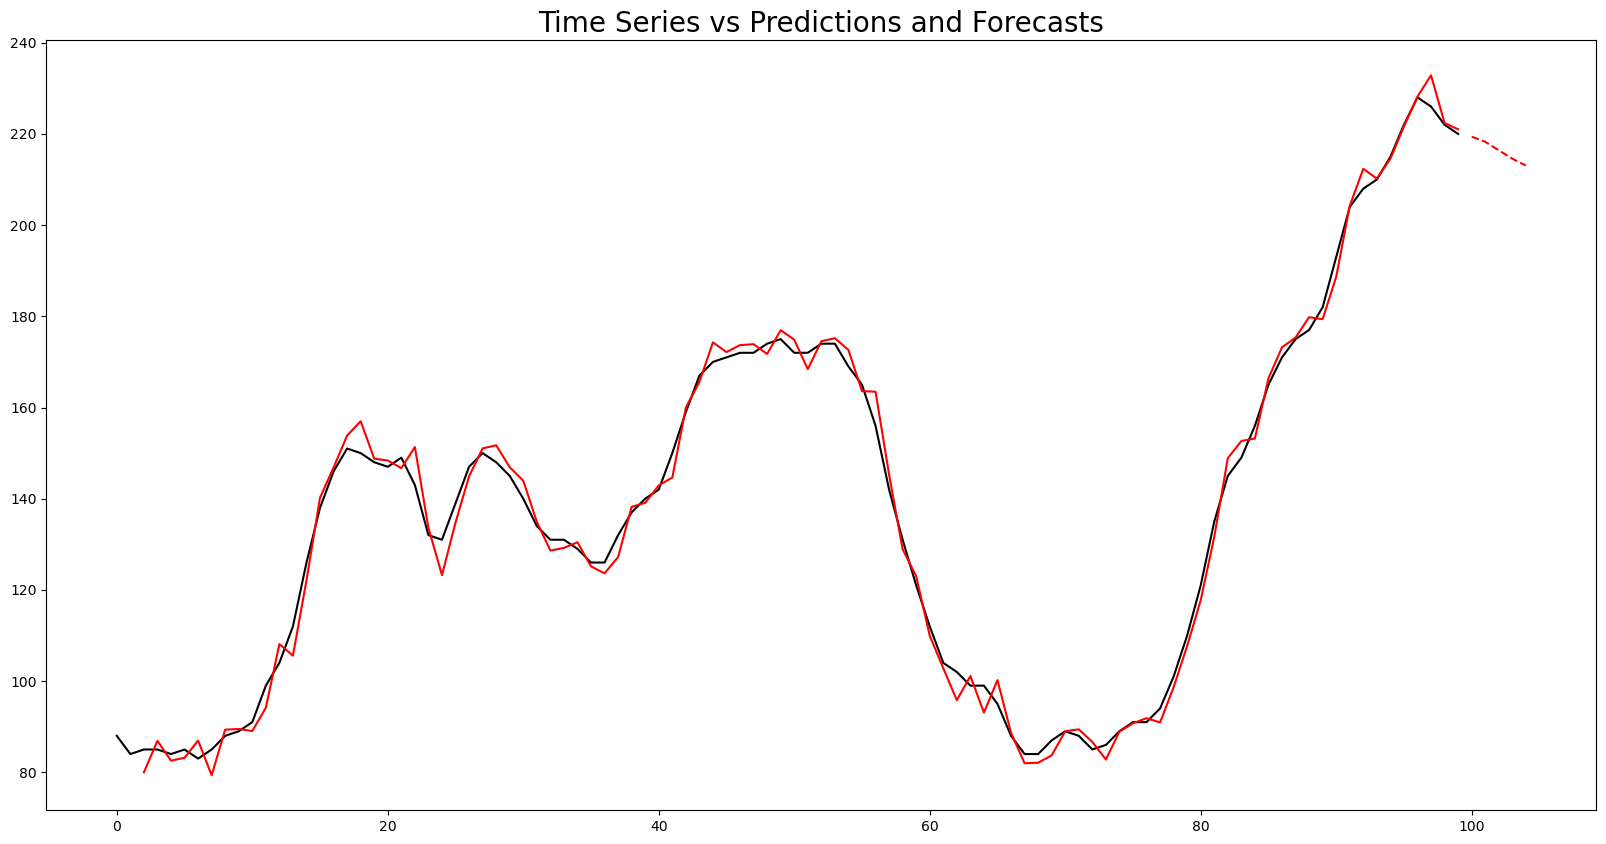

In [76]:
predictions = final_results.predict()
forecasts = final_results.forecast(steps = 5)

plt.figure(figsize = (20,10))
plt.title("Time Series vs Predictions and Forecasts", fontsize = 20)
plt.plot(x, linestyle='-', color = 'black')
plt.plot(predictions[2:], linestyle='-', color='red')   #plot predictions = 2 since we need first two data as initial conditions
plt.plot(forecasts, linestyle = '--', color = 'red')
plt.show()

As another form of comparison, we perform exhaustive search up to ARIMA of order (5,5,5).
Criteria for selection:
1. p-value of Ljung-Box statistic > 0.05
2. AIC is the lowest.

In [13]:
#Brute force search

from statsmodels.tsa.arima.model import ARIMA

def find_best_arima(data, max_order=(5, 5, 5)):

  best_model = None
  best_aic = float('inf')  # Initialize with inf AIC
  best_pdq = ()

  for p in range(max_order[0] + 1):
    for d in range(max_order[1] + 1):
      for q in range(max_order[2] + 1):
        
          model = ARIMA(data, order=(p, d, q))
          results = model.fit()

        #Ensure adequacy of model
          if results.test_serial_correlation(method = 'ljungbox')[:, 1].flatten().all() > 0.05:

            # Check AIC
            aic = results.aic
            if aic < best_aic:
              best_model = results
              best_aic = aic
              best_pdq = (p,d,q)
          
        
  return best_model, best_pdq

model, order = find_best_arima(x)
print(f"Best model is ARIMA{order}, with AIC of {model.aic}")



c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\User

Best model is ARIMA(3, 2, 1), with AIC of 510.7125694565785


c:\Users\User\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC of the best model from our exhaustive search, ARIMA(3, 2, 1), is roughly the same as ARIMA(2, 2, 0).

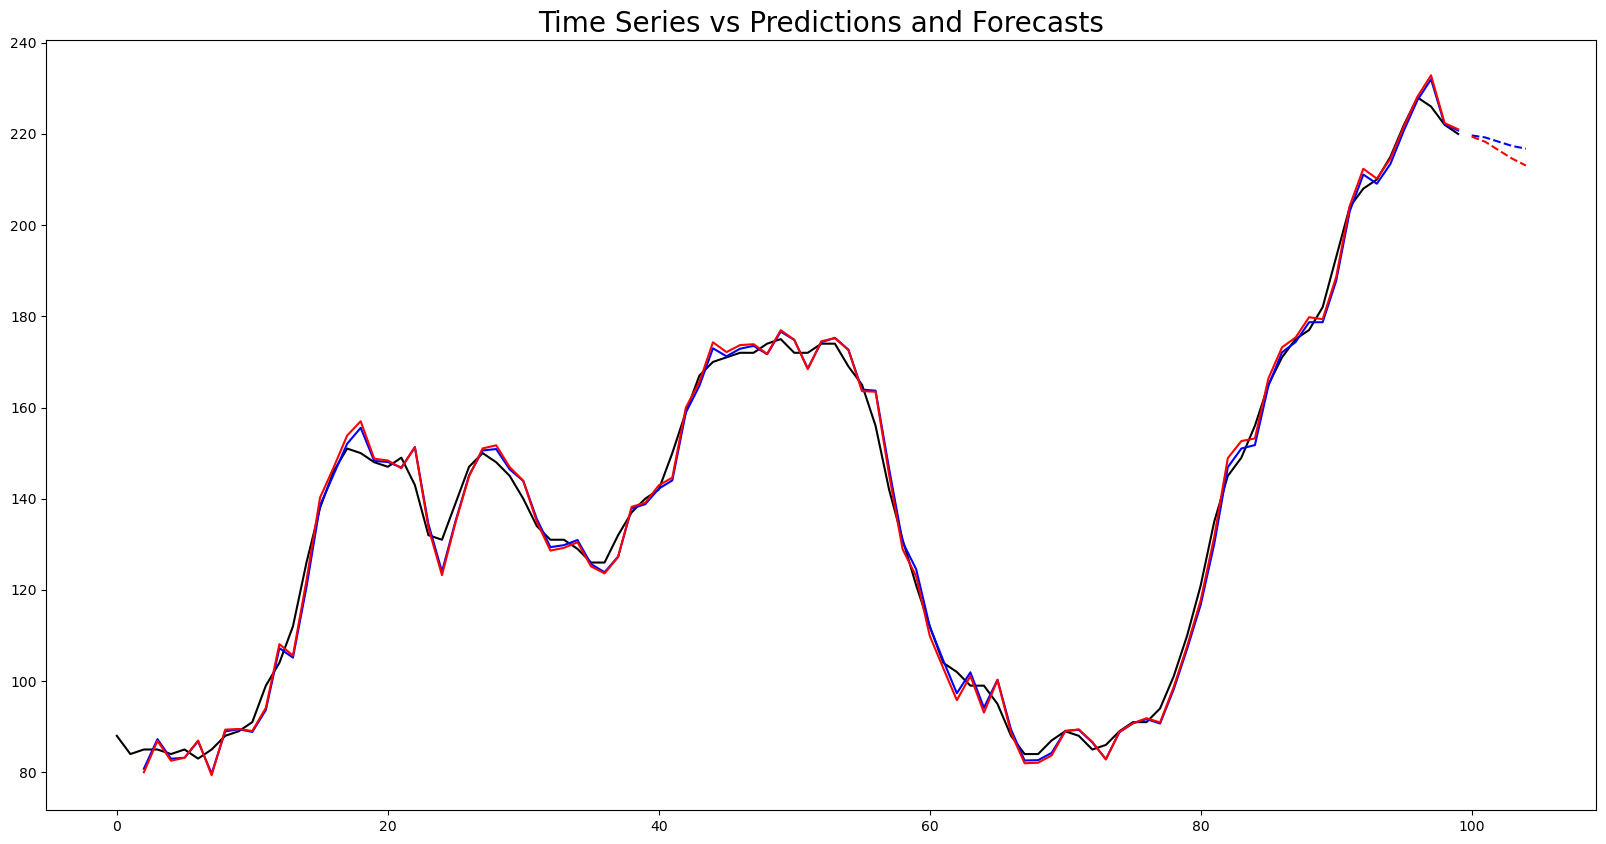

In [17]:
predictions_best = model.predict()
forecasts_best = model.forecast(steps = 5)

predictions = final_results.predict()
forecasts = final_results.forecast(steps = 5)

plt.figure(figsize = (20,10))
plt.title("Time Series vs Predictions and Forecasts", fontsize = 20)
plt.plot(x, linestyle='-', color = 'black')
plt.plot(predictions_best[2:], linestyle='-', color='blue')   #plot predictions = 2 since we need first two data as initial conditions
plt.plot(forecasts_best, linestyle = '--', color = 'blue')
plt.plot(predictions[2:], linestyle='-', color='red')   #plot predictions = 2 since we need first two data as initial conditions
plt.plot(forecasts, linestyle = '--', color = 'red')
plt.show()

The plots are roughly the same as well